## The Data

#### Source:

Owner of database: Volker Lohweg (University of Applied Sciences, Ostwestfalen-Lippe, volker.lohweg '@' hs-owl.de)
Donor of database: Helene DÃ¶rksen (University of Applied Sciences, Ostwestfalen-Lippe, helene.doerksen '@' hs-owl.de)
Date received: August, 2012


#### Data Set Information:

Data were extracted from images that were taken from genuine and forged banknote-like specimens. For digitization, an industrial camera usually used for print inspection was used. The final images have 400x 400 pixels. Due to the object lens and distance to the investigated object gray-scale pictures with a resolution of about 660 dpi were gained. Wavelet Transform tool were used to extract features from images.


#### Attribute Information:

1. variance of Wavelet Transformed image (continuous)
2. skewness of Wavelet Transformed image (continuous)
3. curtosis of Wavelet Transformed image (continuous)
4. entropy of image (continuous)
5. class (integer)

## Imports

In [46]:
# Importing Dependencies
import warnings
import pandas as pd # Data analysis 
import numpy as np # Numerical work
import matplotlib.pyplot as plt # Visualization
import seaborn as sns # vsiualization

from sklearn.ensemble import RandomForestClassifier # classification model
from sklearn.svm import SVC # Classification Model

from sklearn.model_selection import train_test_split # Spliting data into train test split
from sklearn.model_selection import GridSearchCV # Searching for best hyperparameters

from sklearn.metrics import accuracy_score, plot_confusion_matrix

warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('1.1 data_banknote_authentication.csv')
df.head()

,Variance_Wavelet,Skewness_Wavelet,Curtosis_Wavelet,Image_Entropy,Class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


## EDA

In [5]:
df.shape

(1372, 5)

#### Missing Values

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1372 entries, 0 to 1371
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Variance_Wavelet  1372 non-null   float64
 1   Skewness_Wavelet  1372 non-null   float64
 2   Curtosis_Wavelet  1372 non-null   float64
 3   Image_Entropy     1372 non-null   float64
 4   Class             1372 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 53.7 KB


In [7]:
df.isnull().sum()

Variance_Wavelet    0
Skewness_Wavelet    0
Curtosis_Wavelet    0
Image_Entropy       0
Class               0
dtype: int64

In [9]:
# Exploring how many valaues do we have in Class column
df.Class.unique()

array([0, 1], dtype=int64)

In [11]:
# Basic Statistical Analysis
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Variance_Wavelet,1372.0,0.433735,2.842763,-7.0421,-1.773000,0.49618,2.821475,6.8248
Skewness_Wavelet,1372.0,1.922353,5.869047,-13.7731,-1.708200,2.31965,6.814625,12.9516
Curtosis_Wavelet,1372.0,1.397627,4.310030,-5.2861,-1.574975,0.61663,3.179250,17.9274
Image_Entropy,1372.0,-1.191657,2.101013,-8.5482,-2.413450,-0.58665,0.394810,2.4495
Class,1372.0,0.444606,0.497103,0.0000,0.000000,0.00000,1.000000,1.0000


### Visualiztion

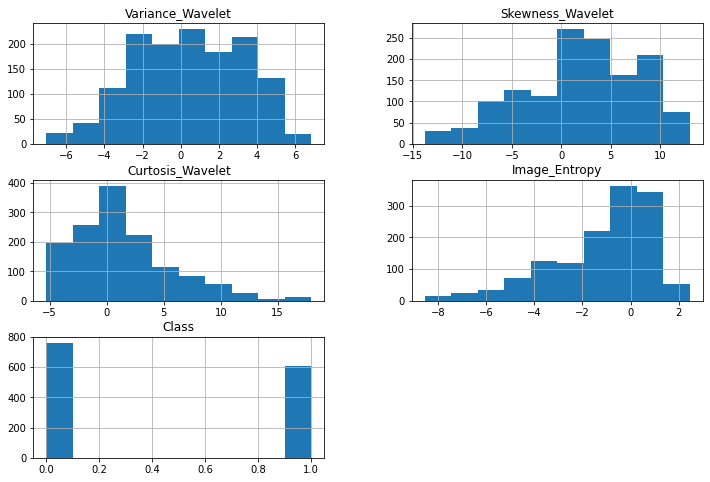

In [13]:
df.hist(figsize=(12,8));

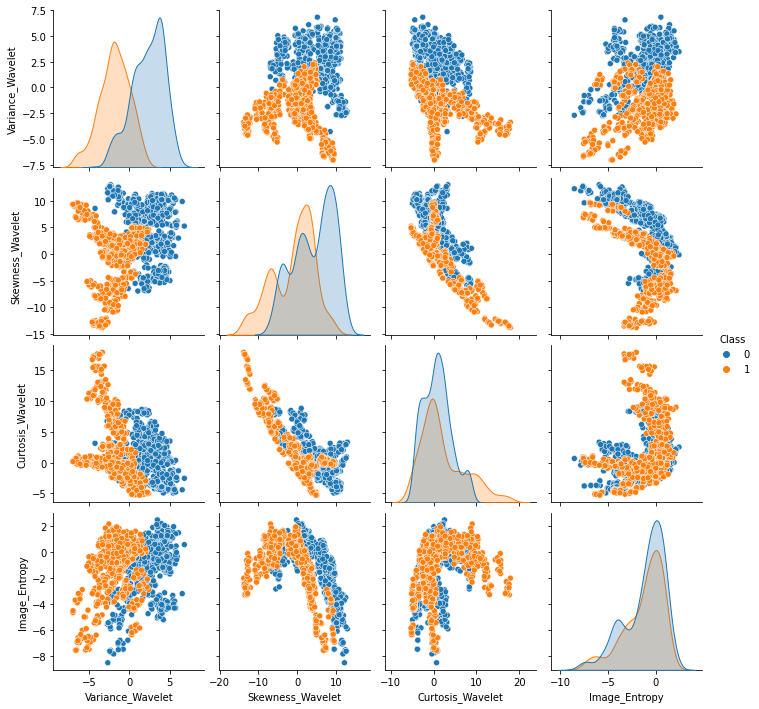

In [15]:
sns.pairplot(data=df, hue='Class');

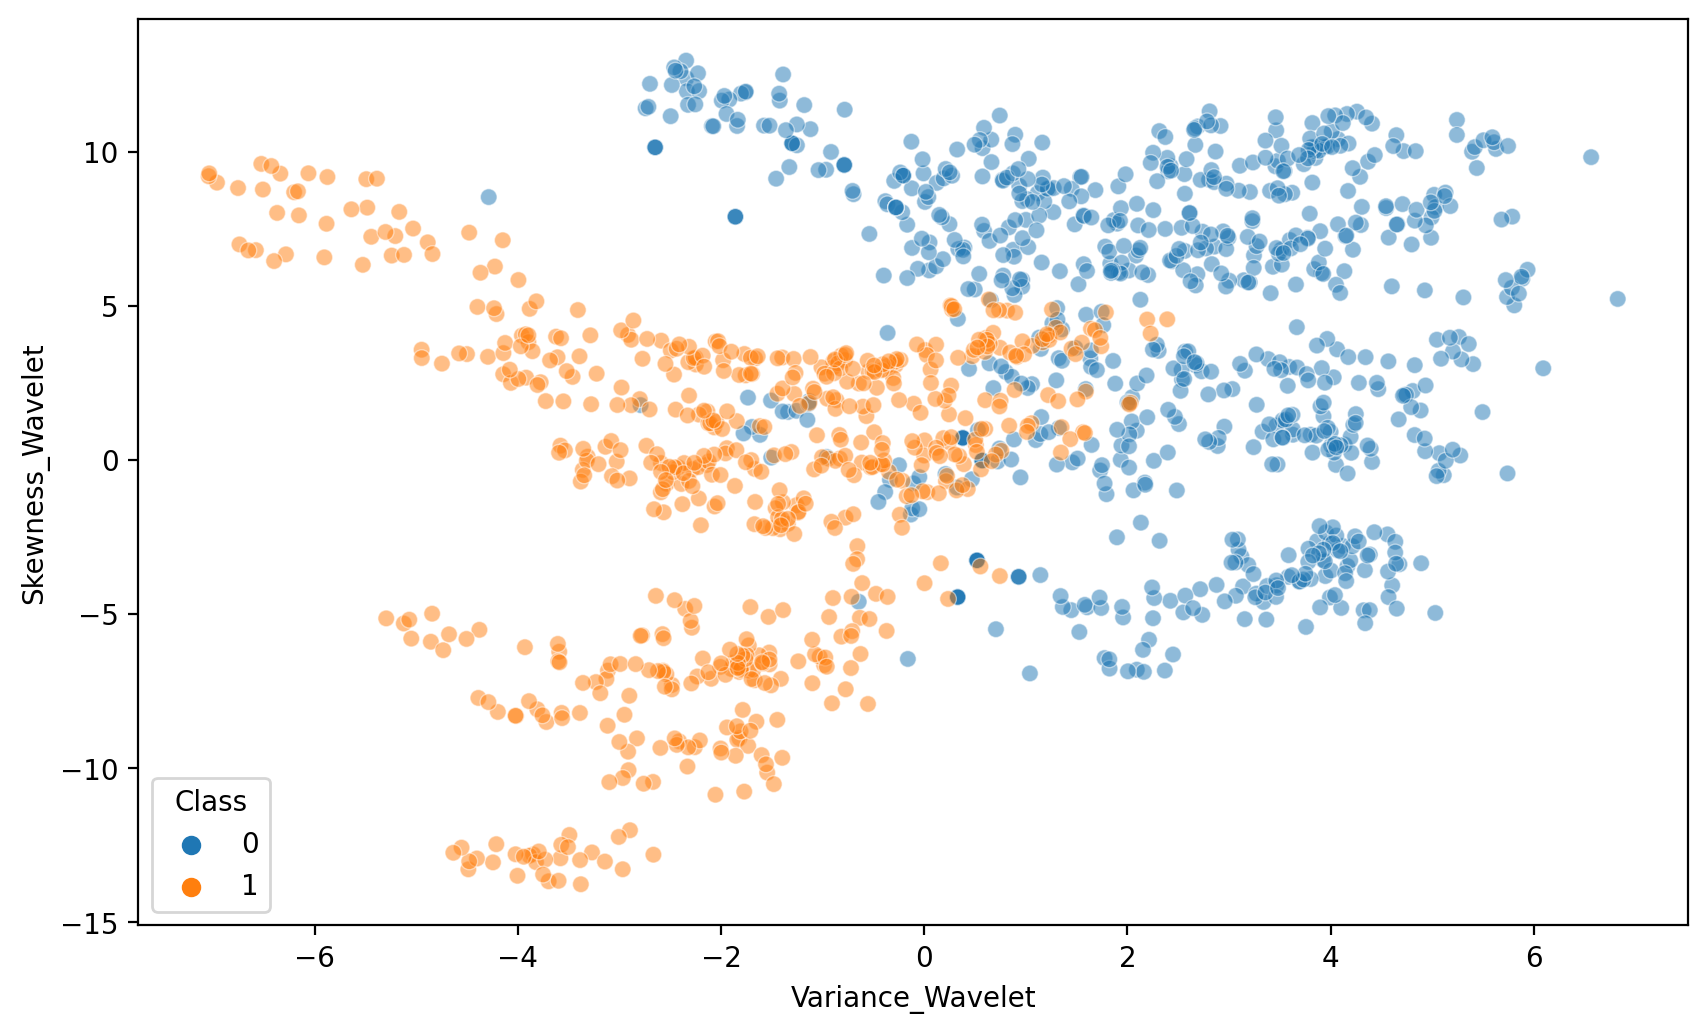

In [20]:
plt.figure(figsize=(10,6),dpi=200)
sns.scatterplot(data=df,x='Variance_Wavelet', y='Skewness_Wavelet', hue="Class",alpha=.5);

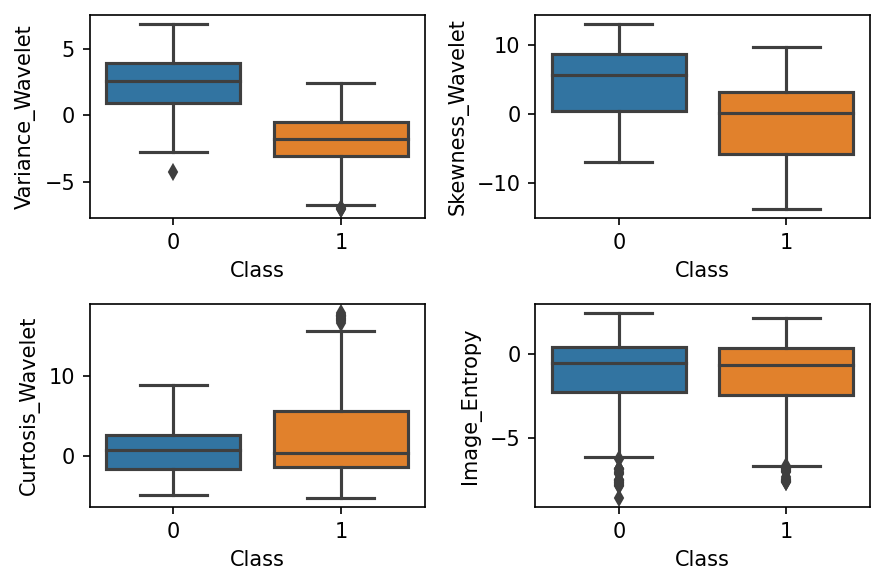

In [41]:
fig,ax = plt.subplots(nrows=2,ncols=2, figsize = (6,4),dpi=150)
sns.boxplot(data=df,x='Class',y="Variance_Wavelet", ax=ax[0][0])
sns.boxplot(data=df,x='Class',y="Skewness_Wavelet", ax=ax[0][1])
sns.boxplot(data=df,x='Class',y="Curtosis_Wavelet", ax=ax[1][0])
sns.boxplot(data=df,x='Class',y="Image_Entropy", ax=ax[1][1])
plt.tight_layout();

# sns.catplot(data=df,x='Class',y='Variance_Wavelet',kind='box',palette='Dark2',ax=ax[0,0])

We can see from the scattar and distribution plots that the classes are easily seprable

## Train | Test Split

In [44]:
X = df.drop(columns="Class")
y = df.Class

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

## Logestic Regression

In [98]:
from sklearn.linear_model import LogisticRegressionCV # Logestic Regression Model
from sklearn.preprocessing import StandardScaler # for scaling Data

In [99]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [101]:
# Training model
lr_model = LogisticRegressionCV(cv=5)
lr_model.fit(scaled_X_train,y_train)

LogisticRegressionCV(cv=5)

In [102]:
# prediction of X_test
lr_pred = lr_model.predict(X_test)

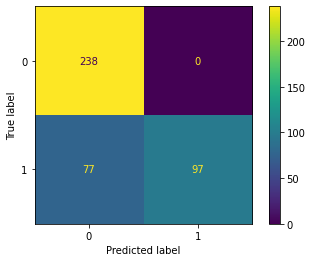

In [103]:
plot_confusion_matrix(estimator=lr_model,X=X_test,y_true=y_test);

In [104]:
accuracy_score(y_test,lr_pred)

0.8131067961165048

## Random Forest Classifier

In [42]:
rfc_model = RandomForestClassifier()

#### Elbow Method to find the best n_estimators
Elbow Method work well while finding n_estimators, Because the model does not overfit if you increase the number of estimators. Therefore visualizing and choosing manuly is best way 

In [78]:
error = []
n_missclassifications = []
for n in range(1,200):
    rfc = RandomForestClassifier(n_estimators=n,random_state=101)
    rfc.fit(X_train,y_train)
    pred = rfc.predict(X_test)
    
    err = 1 - accuracy_score(y_test,pred)
    n_missed = np.sum(y_test!=pred)
    
    error.append(err)
    n_missclassifications.append(n_missed)

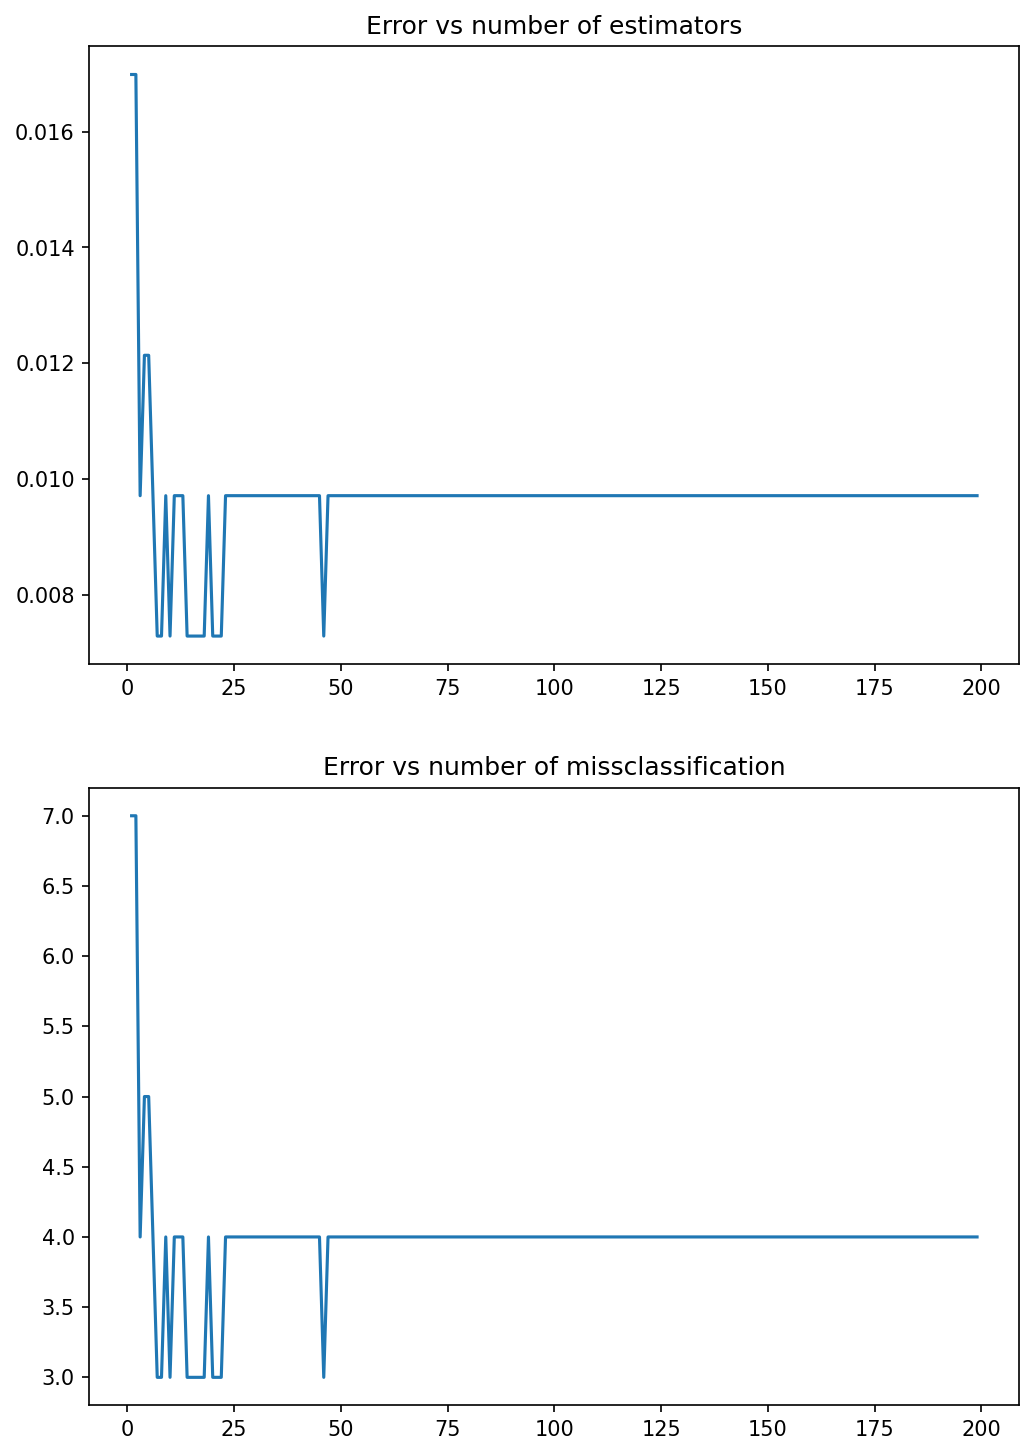

In [79]:
fig, axes =plt.subplots(nrows=2,ncols=1,figsize = (8,12),dpi=150)
axes[0].set_title('Error vs number of estimators')

axes[0].plot(range(1,200),error)

axes[1].set_title('Error vs number of missclassification')

axes[1].plot(range(1,200),n_missclassifications)

We see from the graph that the best n_estimators are between 1-25 lets Check for more hyperparameters through grid search

### Checking for other Hyperparameters through Grid Search

In [81]:
n_features = [2,3,4]
n_estimators = range(1,50)
bootstrap = [True,False]
estimator = RandomForestClassifier(random_state=101)

para_grid = {'max_features': n_features,
             'n_estimators': n_estimators,
             'bootstrap': bootstrap
}

grid_model = GridSearchCV(estimator=estimator,param_grid=para_grid)
grid_model.fit(X_train,y_train)
grid_model.best_params_

{'bootstrap': True, 'max_features': 2, 'n_estimators': 15}

## Final Model 

In [84]:
final_rfc = RandomForestClassifier(n_estimators=15,max_features=2,bootstrap=True, oob_score=True, random_state=101)
final_rfc.fit(X_train,y_train)

RandomForestClassifier(max_features=2, n_estimators=15, oob_score=True,
                       random_state=101)

In [85]:
final_rfc.oob_score_

0.990625

In [86]:
final_pred = final_rfc.predict(X_test)

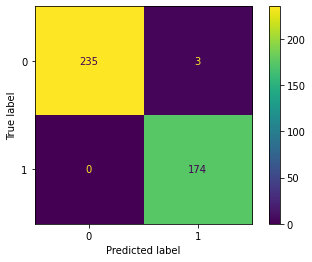

In [90]:
plot_confusion_matrix(estimator=final_rfc, X=X_test,y_true=y_test);

In [92]:
accuracy_score(y_test,final_pred)

0.9927184466019418

There is Only 3 miss Classification out of 412 data points

In [93]:
(pd.DataFrame(
    index=X.columns,
    data= final_rfc.feature_importances_, 
    columns=['Feature Importance'])
 .sort_values(by = 'Feature Importance',ascending=False))

,Feature Importance
Variance_Wavelet,0.584281
Skewness_Wavelet,0.231310
Curtosis_Wavelet,0.147904
Image_Entropy,0.036505
